In [2]:
import pandas as pd
hour = pd.read_csv("data/hour.csv")
print(hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  count  
0           1  0.24  0.2879  0.81        0.0       3          13     16  
1           1  0.22  0.2727  0.80        0.0       8          32     40  
2           1  0.22  0.2727  0.80        0.0       5          27     32  
3           1  0.24  0.2879  0.75        0.0       3          10     13  
4           1  0.24  0.2879  0.75        0.0       0           1      1  


In [3]:
print(hour["count"].mean())

189.46308763450142


In [5]:
print(hour["count"].median())
print(hour["count"].std())
print(hour["registered"].min())
print(hour["registered"].max())

142.0
181.38759909186476
0
886


In [6]:
print(hour.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [7]:
print(hour.loc[3, "count"])

13


In [8]:
print(hour.loc[2:4, "registered"])

2    27
3    10
4     1
Name: registered, dtype: int64


In [9]:
print(hour.loc[hour["hr"]<5, "registered"].mean())

20.7881427367238


In [10]:
print(hour.loc[hour["hr"]<5 & (hour["temp"]<0.50), "registered"].mean())
print(hour.loc[hour["hr"]<5 & (hour["temp"]>0.50), "registered"].mean())

34.055263157894736
54.27190332326284


In [13]:
print(hour.loc[(hour["temp"]>0.5) | (hour["hum"]>0.5), "count"].mean())

193.36764103264582


In [15]:
print(hour.groupby(["season", "holiday"])["count"].mean())

season  holiday
1       0          112.685875
        1           72.042683
2       0          208.428472
        1          204.552083
3       0          235.976818
        1          237.822917
4       0          199.965998
        1          167.722222
Name: count, dtype: float64


Matplotlib is building the font cache; this may take a moment.


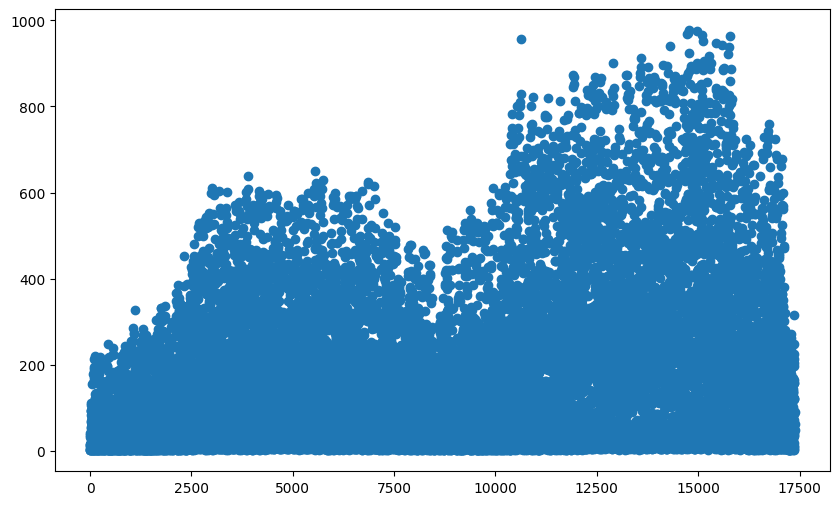

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=hour["instant"], y=hour["count"])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Count by Hour")
plt.show()

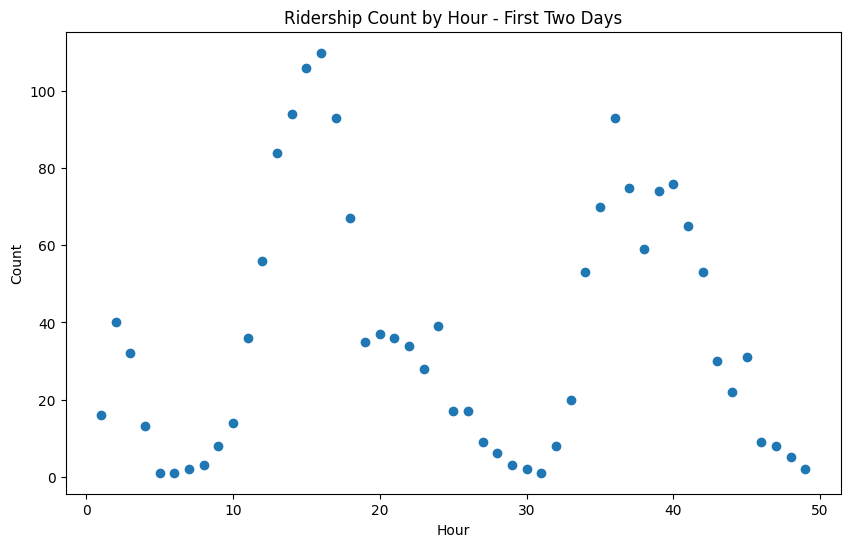

In [17]:
hour_first48=hour.loc[0:48,:]
fix, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=hour_first48["instant"], y=hour_first48["count"])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Count by Hour - First Two Days")
plt.show()

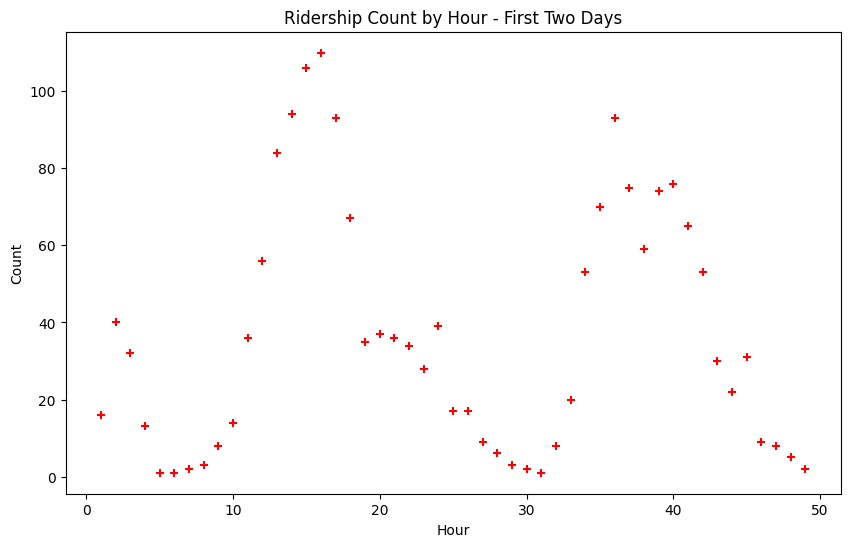

In [18]:
fix, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=hour_first48["instant"], y=hour_first48["count"], c="red", marker="+")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Count by Hour - First Two Days")
plt.show()

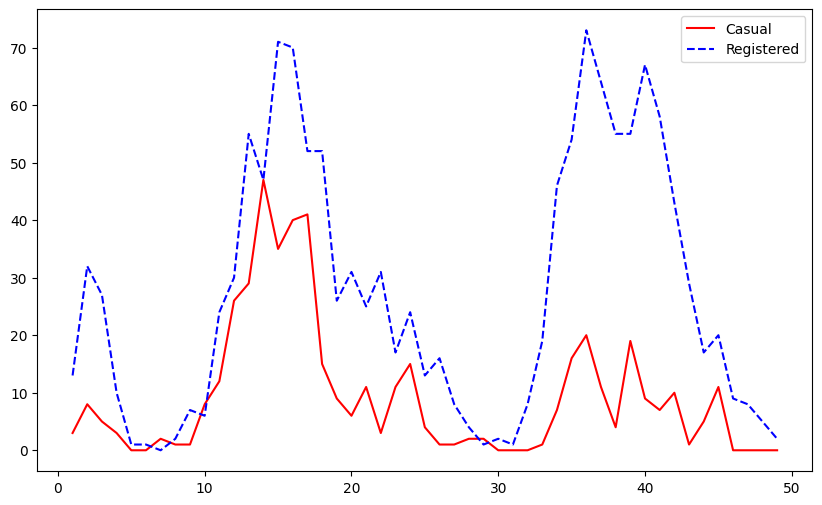

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hour_first48["instant"], hour_first48["casual"], c="red", label="Casual", linestyle="-")
ax.plot(hour_first48["instant"], hour_first48["registered"], c="blue", label="Registered", linestyle="--")
ax.legend()
plt.show()

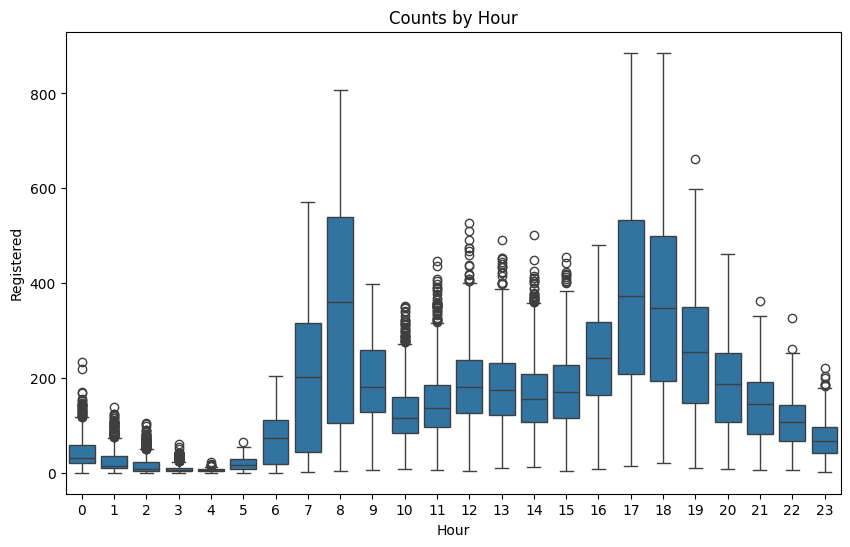

In [20]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x="hr", y="registered", data=hour)
plt.xlabel("Hour")
plt.ylabel("Registered")
plt.title("Counts by Hour")
plt.show()

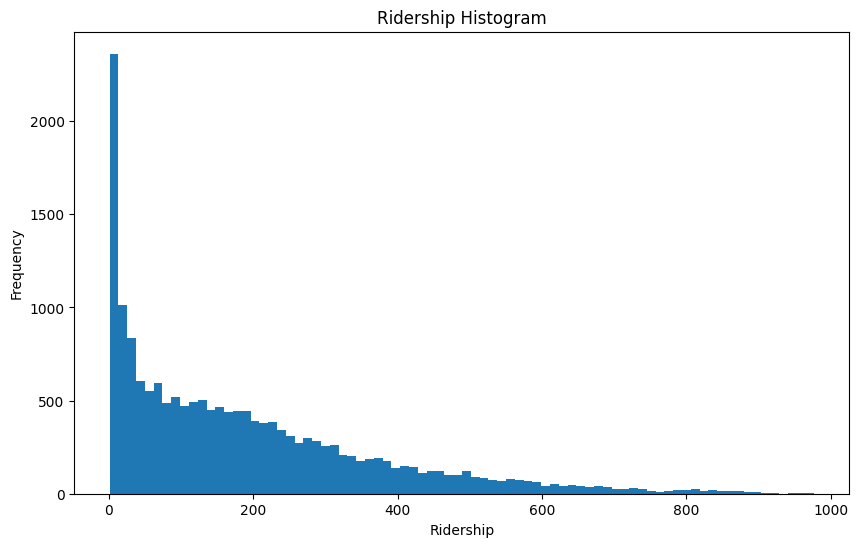

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(hour["count"], bins=80)
plt.xlabel("Ridership")
plt.ylabel("Frequency")
plt.title("Ridership Histogram")
plt.show()

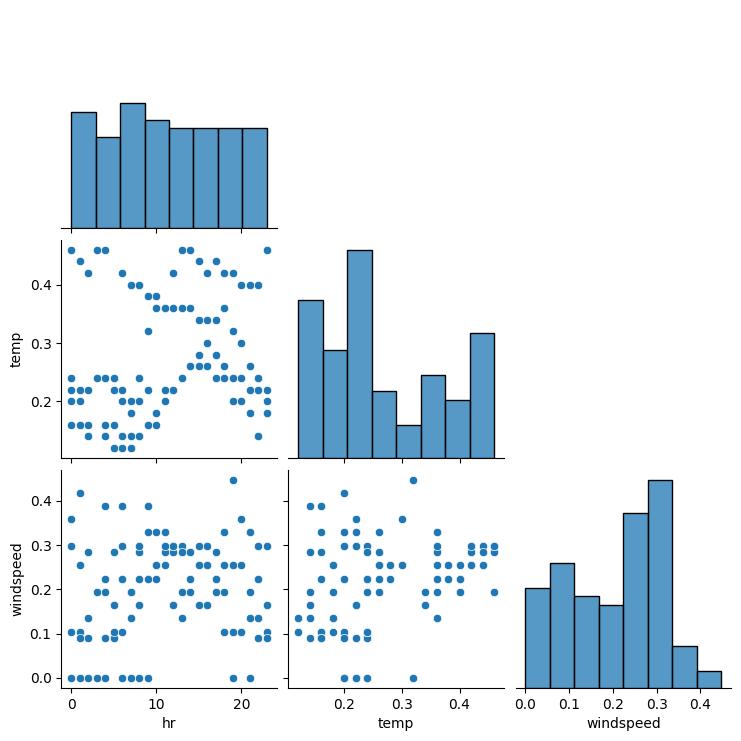

In [22]:
thevariables = ["hr", "temp", "windspeed"]
hour_first100=hour.loc[0:100,thevariables]
sns.pairplot(hour_first100, corner=True)
plt.show()

In [23]:
print(hour["casual"].corr(hour["registered"]))
print(hour["temp"].corr(hour["hum"]))

0.5066177004294632
-0.06988139105119348


In [24]:
thenames = ["hr", "temp", "windspeed"]
cor_matrix = hour[thenames].corr()
print(cor_matrix)

                 hr      temp  windspeed
hr         1.000000  0.137603   0.137252
temp       0.137603  1.000000  -0.023125
windspeed  0.137252 -0.023125   1.000000


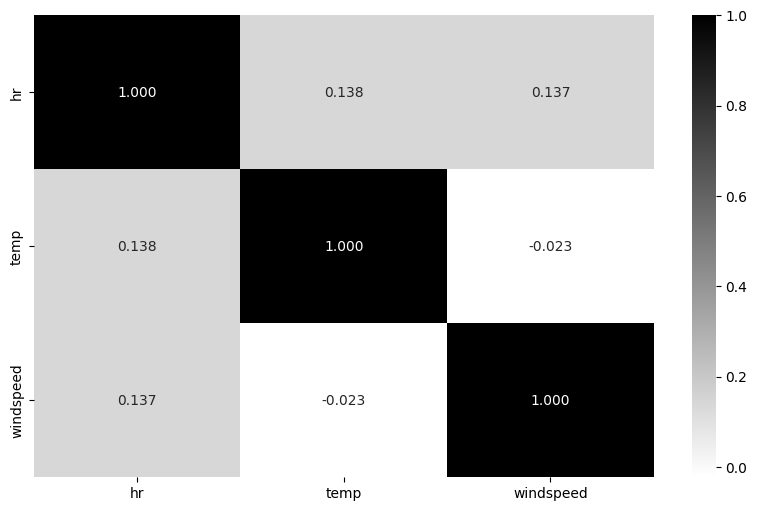

In [25]:
plt.figure(figsize=(10,6))
corr = hour[thenames].corr()
sns.heatmap(corr, annot=True, cmap="binary", fmt=".3f", xticklabels=thenames, yticklabels=thenames)
plt.show()

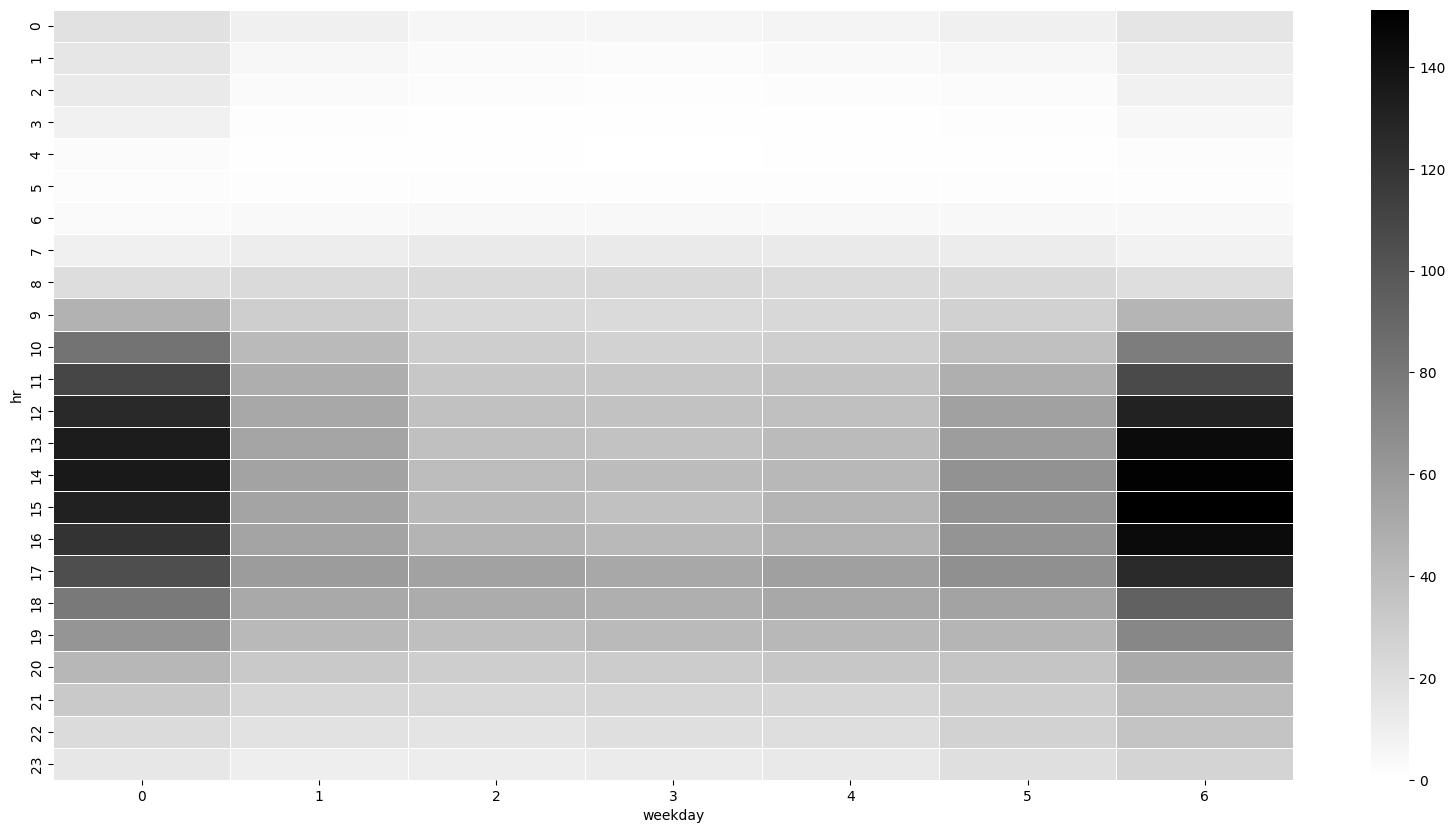

In [29]:
# Create a pivot table
df_hm = hour.pivot_table(index="hr", columns="weekday", values="casual")
# Draw a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df_hm, fmt="d", cmap="binary", linewidths=.5, vmin=0)
plt.show()